In [2]:
import gym 
import numpy as np
import random as rn
from pylab import *
import math as mt

In [3]:
env = gym.make("CartPole-v1")#,render_mode="human"

In [4]:
act_spc = env.action_space.n
obs_spc = env.observation_space.shape
#just in case
H_obs_spc = env.observation_space.high
L_obs_spc = env.observation_space.low

In [24]:
#Hyperparameters: 
lr = 0.01
gamma = 0.96

epoc =90000 #number of iteration
tot = 0
tot_rew = 0
pr_rew =0
#epsilon will change later, not a hyperparameter
eps =1
S_decay_eps = 1 #starting epsilon decay number
E_decay_eps = epoc//2
eps_decay = eps/(E_decay_eps-S_decay_eps)

M_rew= []
Pr_Rew =[]

In [8]:
obs = [30,30,50,50] #honestly, I have no clue why is it set like this
W_size_array = np.array([0.25,0.25,0.01,0.1]) #same as here

In [9]:
#Q-Table:
Qtab = np.random.uniform(low=0,high=1,size=(obs+[act_spc]))
#check Q-Table
Qtab.shape

(30, 30, 50, 50, 2)

In [25]:
def get_D_st(state):
    disc_st = state/W_size_array + np.array([15,10,1,10])
    return tuple(disc_st.astype(np.int))

In [27]:
for i in range(epoc+1):
    disc_st = get_D_st(env.reset()[0])
    done = False
    EpRew = 0 # episode reward ==> starts at 0 for each epoch
    #Check where the loop is
    if i %10000==0:
        print("Episode: "+str(i)) #i is an integer, needs to be string in this case!
    
    while not done:
        #Action selection:
        if np.random.random() > eps:
            act = np.argmax(Qtab[disc_st]) #action from Q-Table
        else:
            act = np.random.randint(0,act_spc) #random action
        
        nw_st,rew,done,_,_ = env.step(act)
        nw_D_state = get_D_st(nw_st)
        
        EpRew += rew
        #Update the Q-Table:
        if not done: 
            F_mxQ = np.max(Qtab[nw_D_state])
            C_Q = Qtab[disc_st+(act,)]
            N_Q = (1-lr)*C_Q+lr*(rew+gamma*F_mxQ)
        
        disc_st = nw_D_state
        
    if E_decay_eps>=i>=S_decay_eps:
        eps -=eps_decay
        if i%1000==0:
            print("Epsilon: ",str(eps))
    tot_rew += EpRew
    pr_rew = EpRew
    
    if i %500==0:
        mean_rew = tot_rew/500
        #print("Mean Reward: ",str(mean_rew))
        M_rew.append(mean_rew)
        tot_rew=0
        
env.close()
        
        

Episode: 0
Epsilon:  0.9777772839396617
Epsilon:  0.9555545678793234
Epsilon:  0.933331851818985
Epsilon:  0.9111091357586467
Epsilon:  0.8888864196983084
Epsilon:  0.8666637036379701
Epsilon:  0.8444409875776318
Epsilon:  0.8222182715172934
Epsilon:  0.7999955554569551
Episode: 10000
Epsilon:  0.7777728393966168
Epsilon:  0.7555501233362785
Epsilon:  0.7333274072759401
Epsilon:  0.7111046912156018
Epsilon:  0.6888819751552635
Epsilon:  0.6666592590949252
Epsilon:  0.6444365430345869
Epsilon:  0.6222138269742485
Epsilon:  0.5999911109139102
Epsilon:  0.5777683948535719
Episode: 20000
Epsilon:  0.5555456787932336
Epsilon:  0.5333229627328953
Epsilon:  0.5111002466725569
Epsilon:  0.4888775306122186
Epsilon:  0.4666548145518803
Epsilon:  0.44443209849154197
Epsilon:  0.42220938243120365
Epsilon:  0.39998666637086533
Epsilon:  0.377763950310527
Epsilon:  0.3555412342501887
Episode: 30000
Epsilon:  0.33331851818985037
Epsilon:  0.31109580212951204
Epsilon:  0.2888730860691737
Epsilon:  0.2

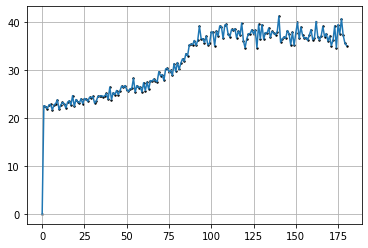

In [29]:
xax = np.arange(0,len(M_rew))
scatter(xax,M_rew,s=2,c='k')
plot(M_rew)

grid(True)

In [28]:
len(M_rew)

181

In [30]:
mean(M_rew)

31.6181546961326